In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#
# **************************************************************************************************************************************************
#	Libraries
# **************************************************************************************************************************************************
#

from keras import optimizers
from keras import applications
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from math import ceil

import datetime
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
#
# **************************************************************************************************************************************************
#	Global Variables
# **************************************************************************************************************************************************
#

# saved filename of model
model_filename = '/content/drive/My Drive/FYP/Project/model.h5'

# saved filename of model weights
weights_filename = '/content/drive/My Drive/FYP/Project/model_weights.h5'
modelcheckpoint_filename = '/content/drive/My Drive/FYP/Project/model_checkpoint.h5'

# saved filename of result csv
results_filename = '/content/drive/My Drive/FYP/Project/results.csv'

# directories of dataset
train_data_dir = '/content/drive/My Drive/FYP/Project/data/train'
# validation_data_dir = '/content/drive/My Drive/FYP/Project/data/validation'
test_data_dir = '/content/drive/My Drive/FYP/Project/data/test'
output_dir = '/content/drive/My Drive/FYP/Project/output'

# dimensions of the architecture
img_width, img_height = 224, 224

# number of channels for the architecture
channels = 3

# number of epochs
epochs = 34

# batch sizes
training_batch_size = 2
validation_batch_size = 1

# learning rate
learning_rate = 0.0001

# class mode
class_mode = 'categorical'

# total number of classes
total_classes = 2

In [0]:
#
# **************************************************************************************************************************************************
#	Functions
# **************************************************************************************************************************************************
#

def summary():
	# model summary
	vgg19.summary()

	# graphing our training and validation
	acc = history.history['acc']
	val_acc = history.history['val_acc']
	loss = history.history['loss']
	val_loss = history.history['val_loss']
	epochs = range(len(acc))
	plt.plot(epochs, acc, 'r', label = 'Training Acc')
	plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
	plt.title('Training and Validation Accuracy')
	plt.ylabel('Accuracy')
	plt.xlabel('Epoch')
	plt.legend()
	plt.figure()
	plt.plot(epochs, loss, 'r', label = 'Training Loss')
	plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
	plt.title('Training and Validation Loss')
	plt.ylabel('Loss')
	plt.xlabel('Epoch')
	plt.legend()
	plt.show()

def saveModel():
	model.save(model_filename)
	model.save_weights(weights_filename)

	model_json = model.to_json()
	with open("model_in_json.json", "w") as json_file:
		json.dump(model_json, json_file)

In [0]:
#
# **************************************************************************************************************************************************
#	Main Code
# **************************************************************************************************************************************************
#

# load model
model = applications.VGG19(include_top = False, weights = 'imagenet', classes = total_classes, input_shape = (img_width, img_height, channels))
flat = Flatten()(model.layers[-1].output)
output = Dense(total_classes, activation = "softmax")(flat)
vgg19 = Model(inputs = model.inputs, outputs = output)

train_datagen = ImageDataGenerator(rescale = 1. / 255,
                                    rotation_range = 90,
                                    brightness_range = [0.2, 1.0],
                                    shear_range = 0.2,
                                    zoom_range = 0.3,
                                    width_shift_range = 1.0,
                                    height_shift_range = 1.0,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    validation_split = 0.4)

# validation_datagen = ImageDataGenerator(rescale = 1. / 255)

# current time
start = datetime.datetime.now()

In [34]:
# training data
training_set = train_datagen.flow_from_directory(
                                		train_data_dir,
                                		target_size = (img_width, img_height),
                                		batch_size = training_batch_size,
                                		class_mode = class_mode,
										#save_to_dir = output_dir,
										#save_prefix = 'Aug',
										subset = "training",
										seed = 42,
                                		shuffle = True)

nb_train_samples = len(training_set.filenames)

Found 352 images belonging to 2 classes.


In [35]:
# validation data
validation_set = train_datagen.flow_from_directory(
                                  		train_data_dir,
                                  		target_size = (img_width, img_height),
                                  		batch_size = validation_batch_size,
                                  		class_mode = class_mode,
										subset = "validation",
										seed = 42,
                                  		shuffle = True)

nb_validation_samples = len(validation_set.filenames)

Found 232 images belonging to 2 classes.


In [0]:
				vgg19.compile(loss = 'categorical_crossentropy',
				optimizer = optimizers.SGD(lr = learning_rate),
				metrics = ['acc'])

In [37]:
# es = EarlyStopping(monitor = 'val_loss',
#                     min_delta = 1e-5,
#                     patience = 5,
#                     verbose = 1,
#                     mode = 'min',
#                     restore_best_weights = True)

mc = ModelCheckpoint(modelcheckpoint_filename,
                        monitor = 'val_loss',
                        mode = 'min',
                        save_weights_only = True,
                        save_best_only = True)

history = vgg19.fit_generator(training_set,
                                steps_per_epoch = nb_train_samples / training_batch_size,
                                epochs = epochs,
                              #remember to put back afteer confiq 2 callbacks = [es,mc],
                                callbacks = [mc],
                                validation_data = validation_set,
                                validation_steps = nb_validation_samples / validation_batch_size)

Epoch 1/34
176/176 [==============================] - 19s 106ms/step - loss: 0.7689 - acc: 0.4631 - val_loss: 0.7342 - val_acc: 0.4871
Epoch 2/34
176/176 [==============================] - 17s 98ms/step - loss: 0.7545 - acc: 0.5341 - val_loss: 0.7321 - val_acc: 0.4957
Epoch 3/34
176/176 [==============================] - 17s 97ms/step - loss: 0.7418 - acc: 0.5028 - val_loss: 0.6887 - val_acc: 0.5216
Epoch 4/34
176/176 [==============================] - 17s 95ms/step - loss: 0.7395 - acc: 0.5284 - val_loss: 0.6956 - val_acc: 0.5216
Epoch 5/34
176/176 [==============================] - 17s 97ms/step - loss: 0.7291 - acc: 0.5597 - val_loss: 0.7705 - val_acc: 0.5086
Epoch 6/34
176/176 [==============================] - 17s 97ms/step - loss: 0.7583 - acc: 0.4915 - val_loss: 0.6876 - val_acc: 0.5647
Epoch 7/34
176/176 [==============================] - 17s 97ms/step - loss: 0.7102 - acc: 0.5625 - val_loss: 0.6887 - val_acc: 0.5259
Epoch 8/34
176/176 [==============================] - 17s 95m

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

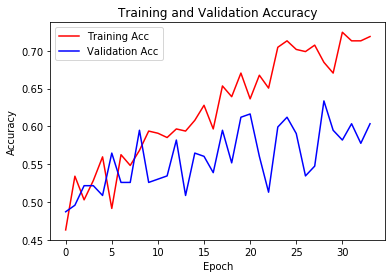

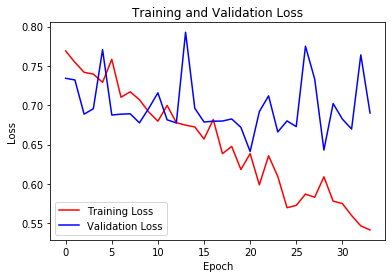

In [38]:
summary()
saveModel()

In [39]:
  (eval_loss, eval_accuracy) = vgg19.evaluate_generator(
 validation_set, steps = nb_validation_samples, verbose = 1)

232/232 [==============================] - 5s 21ms/step


In [40]:
print("[INFO] Accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))
end = datetime.datetime.now()
elapsed = end - start
print('[INFO] Time Elapsed: ', elapsed)

[INFO] Accuracy: 62.50%
[INFO] Loss: 0.670623984444758
[INFO] Time Elapsed:  0:09:34.726727


In [41]:
# test data
test_datagen = ImageDataGenerator()
test_set = test_datagen.flow_from_directory(
                                  		test_data_dir,
                                  		target_size = (img_width, img_height),
                                  		batch_size = 1,
                                  		class_mode = class_mode,
										seed = 42,
                                  		shuffle = True)

step_size_test = test_set.n // test_set.batch_size
test_set.reset()

pred = vgg19.predict_generator(test_set,
                                steps = step_size_test,
                                verbose = 1)

predicted_class_indices = np.argmax(pred, axis = 1)
labels = (test_set.class_indices)

labels = dict((v, k) for k, v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames = test_set.filenames
results = pd.DataFrame({"Filename": filenames,
                      "Prediction": predictions})
results.to_csv(results_filename, index = False)

Found 352 images belonging to 2 classes.
352/352 [==============================] - 4s 13ms/step
